<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_Feature_Engineering_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Data

In [3]:
# Load CSV ke dalam DataFrame
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Tampilkan informasi dasar
print("Train Data:")
print(train_df.info())
print("\nTest Data:")
print(test_df.info())


Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 

EDA

In [4]:
train_df.head()

print("Missing Values in Train:")
print(train_df.isnull().sum())

print("\nMissing Values in Test:")
print(test_df.isnull().sum())

train_df.describe()

Missing Values in Train:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Missing Values in Test:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Visualisasi Tiap Feature

Numerik: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Kategori: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'G

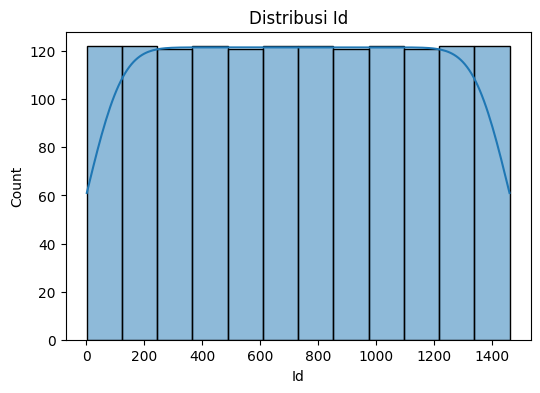

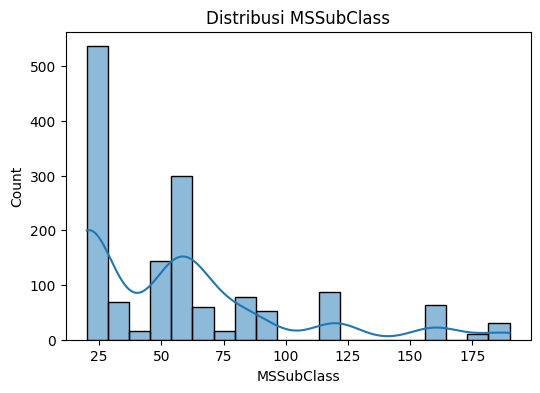

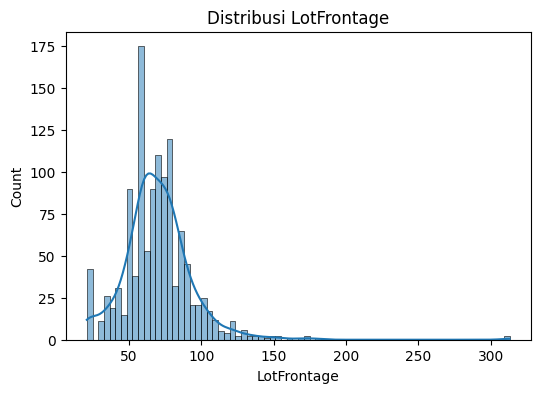

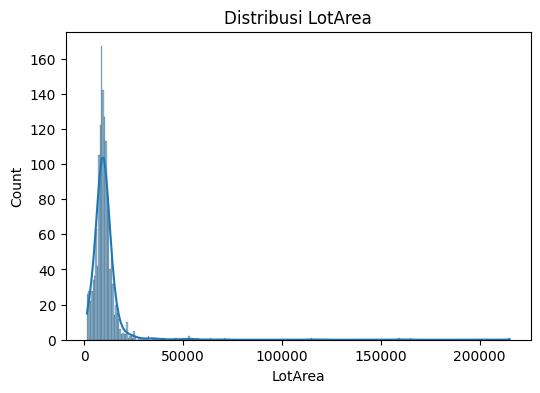

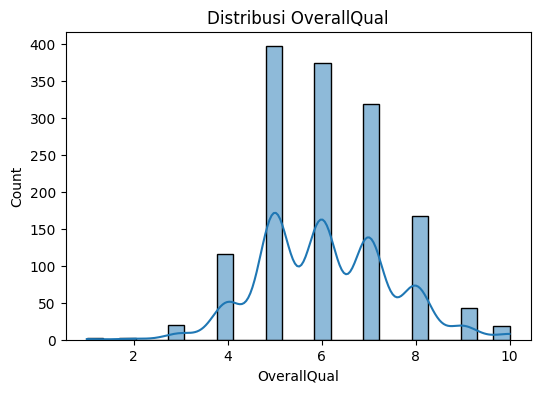

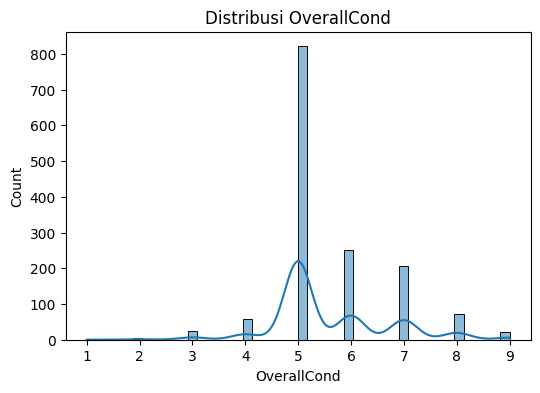

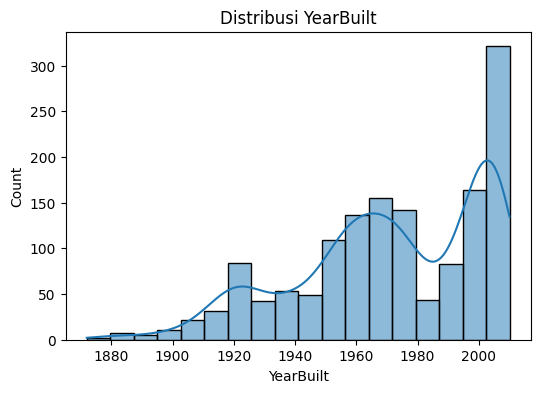

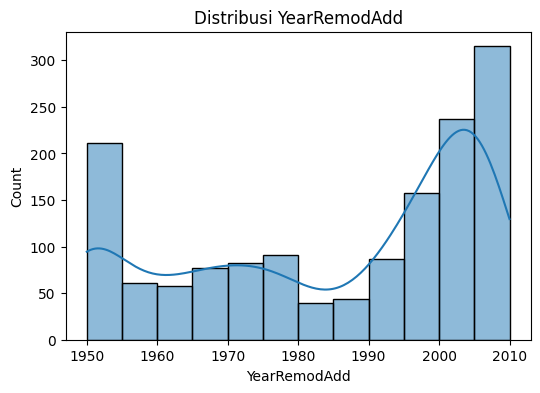

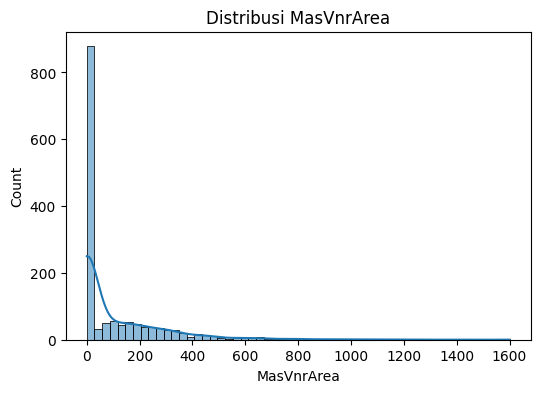

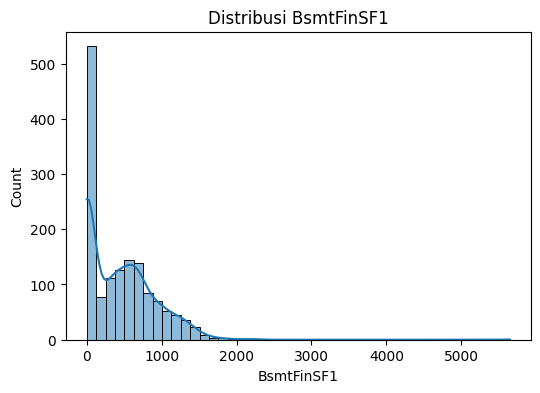

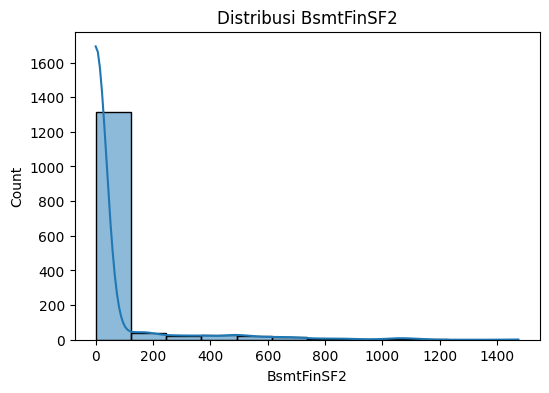

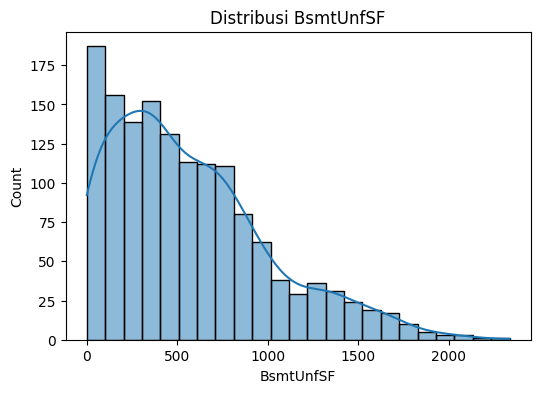

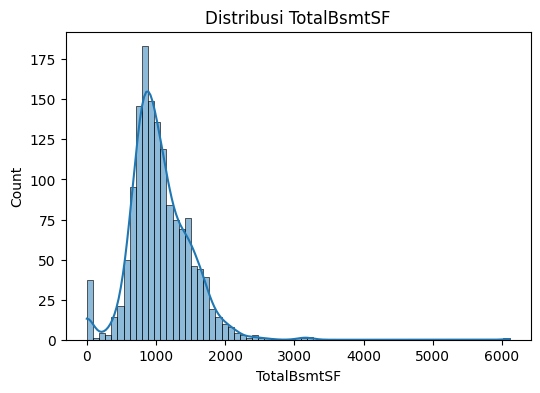

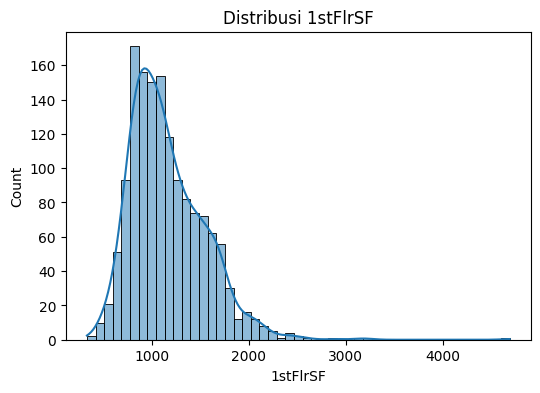

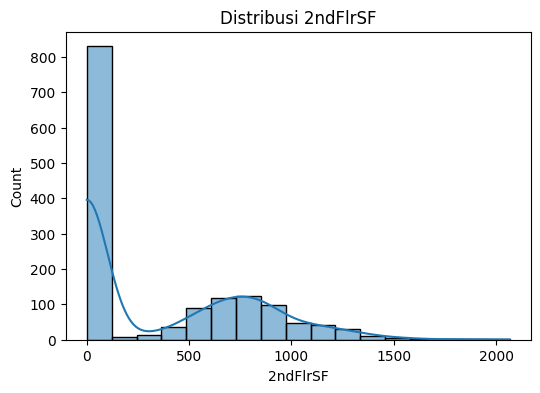

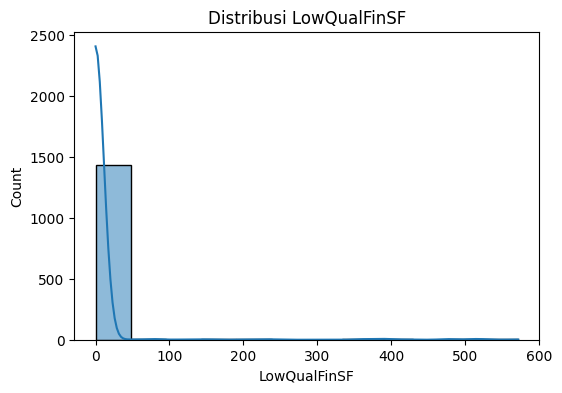

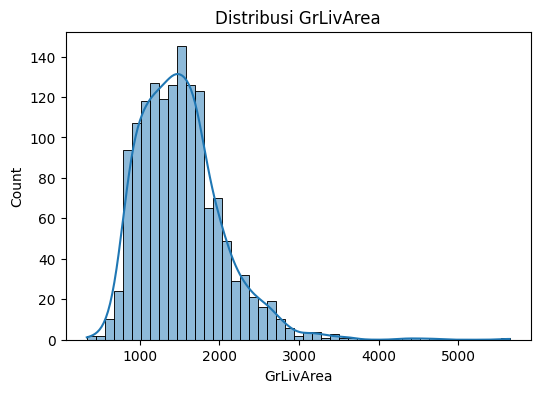

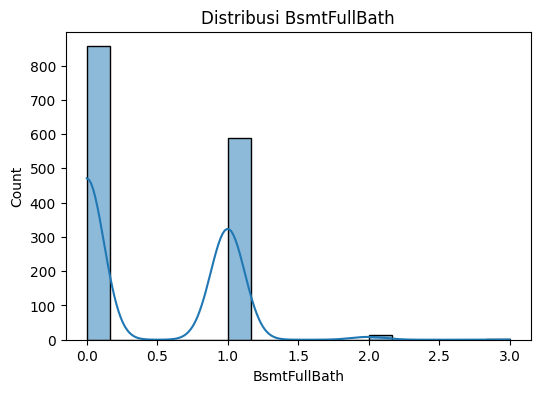

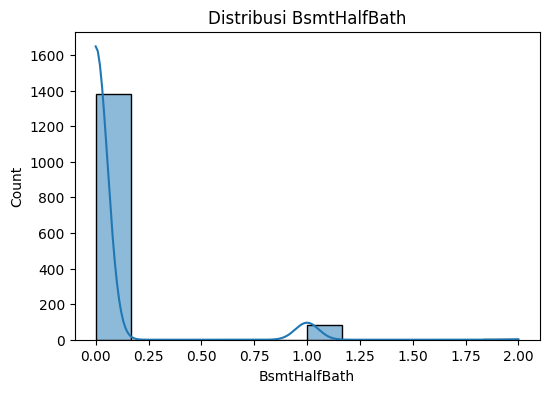

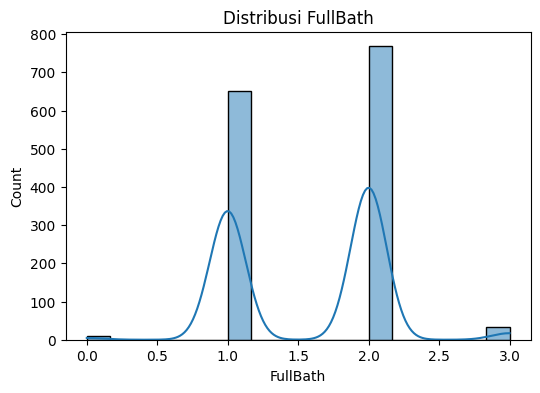

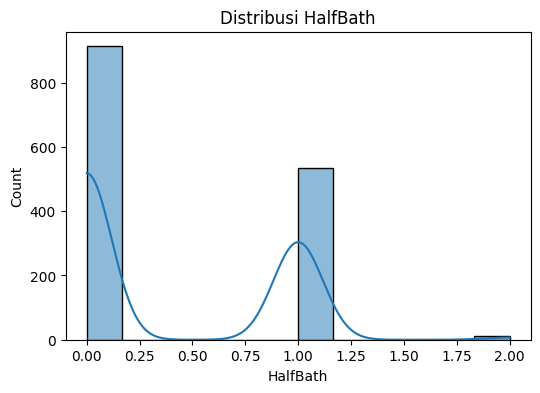

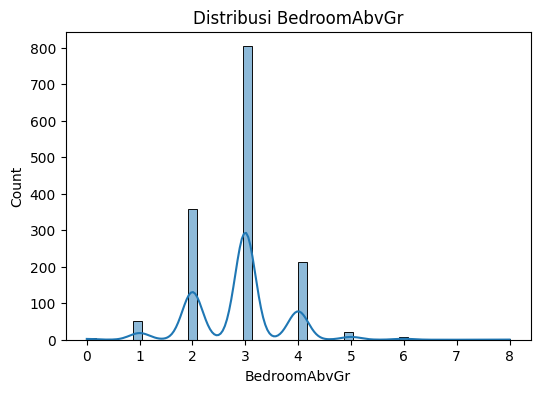

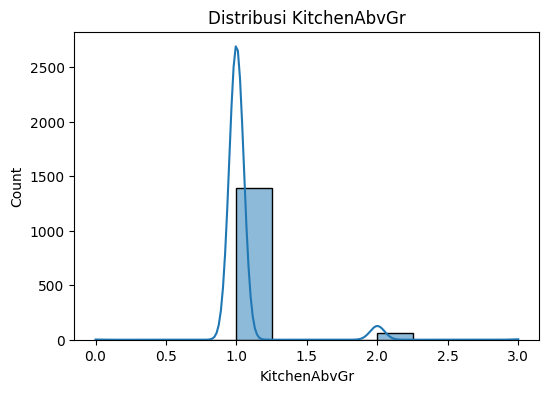

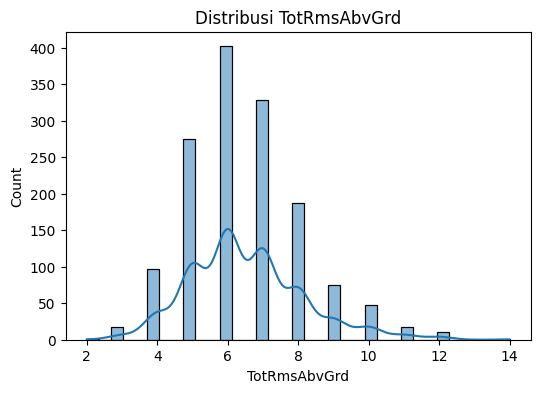

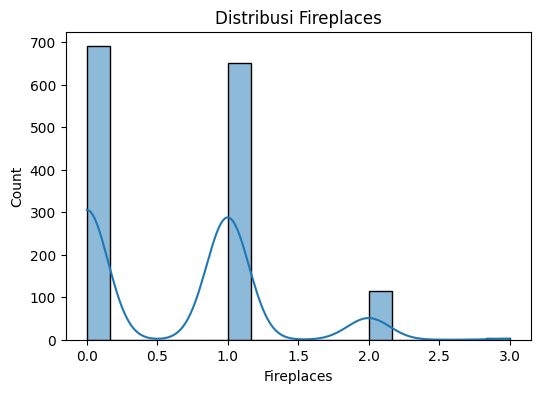

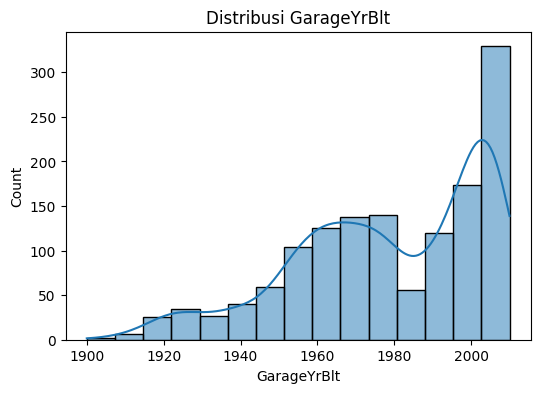

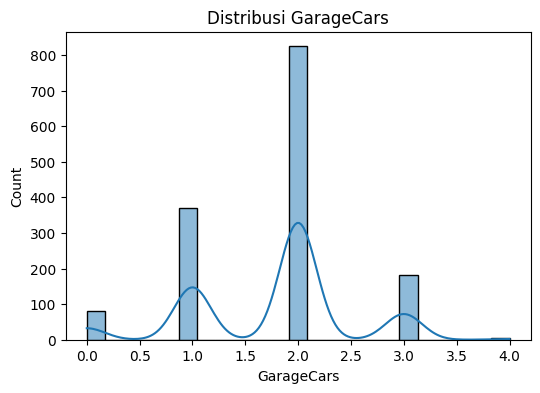

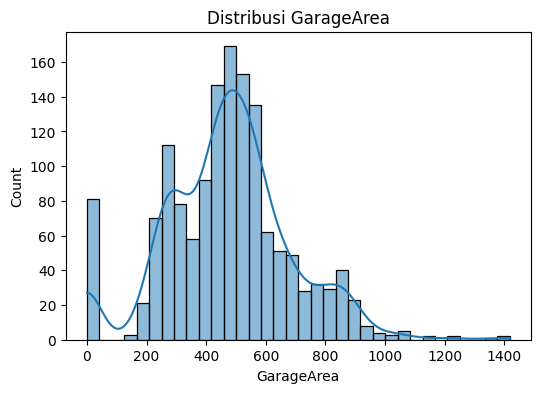

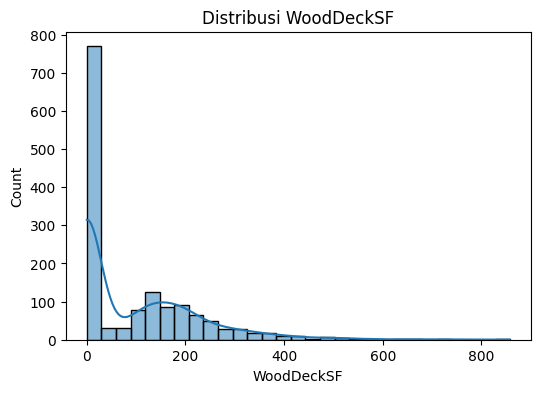

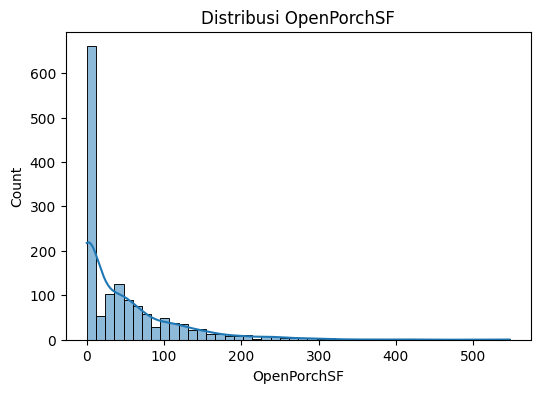

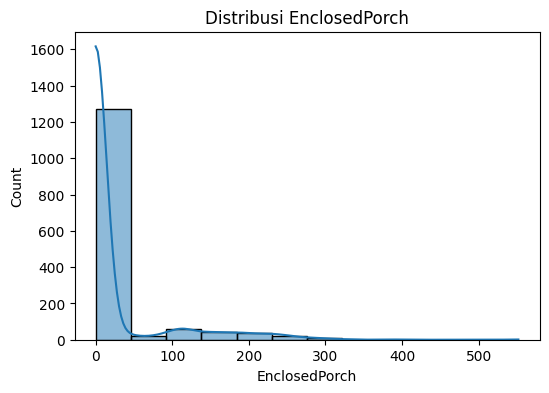

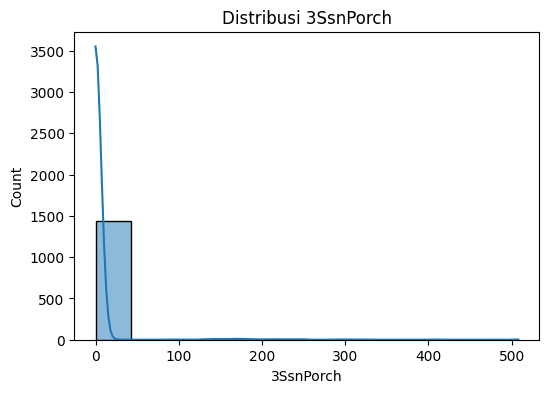

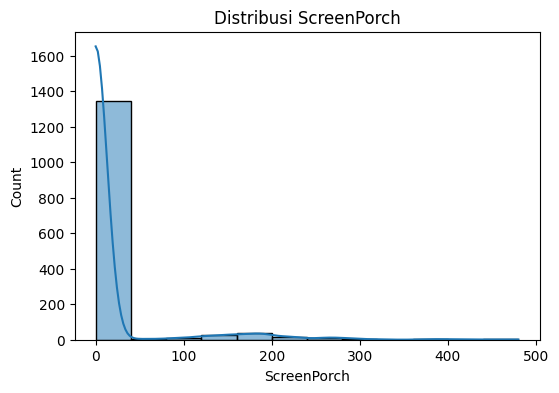

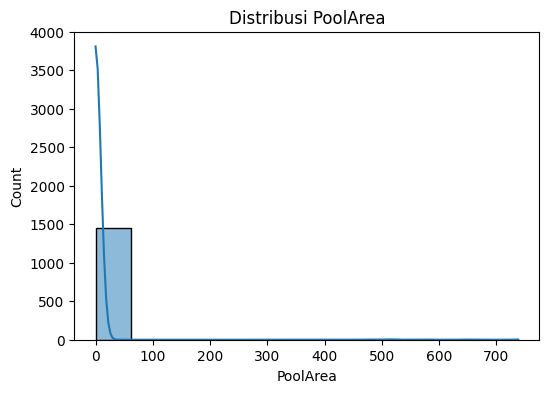

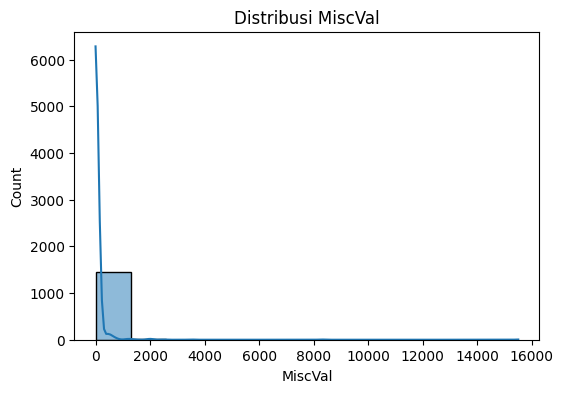

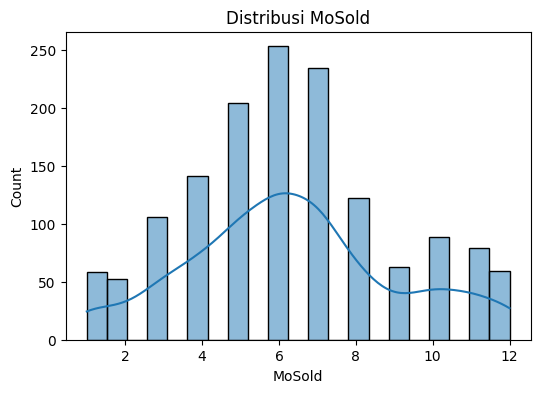

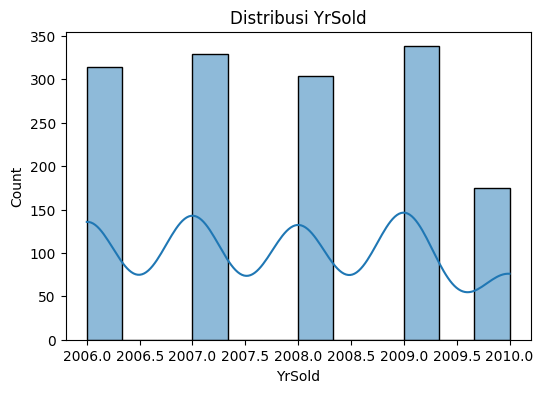

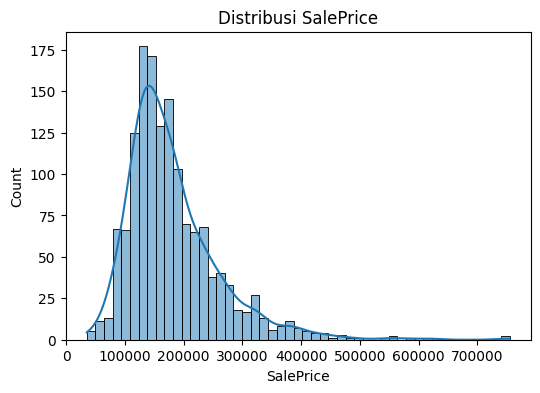

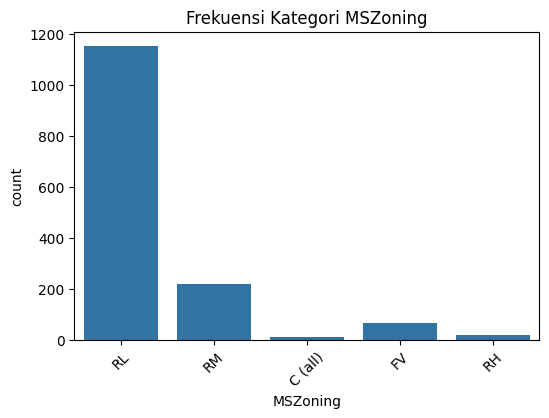

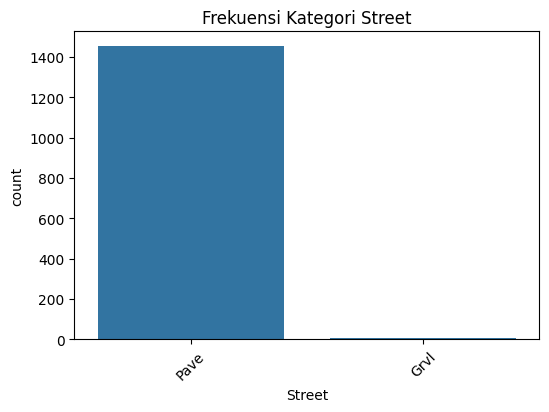

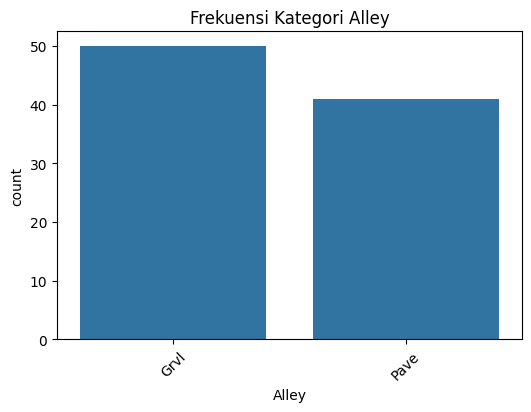

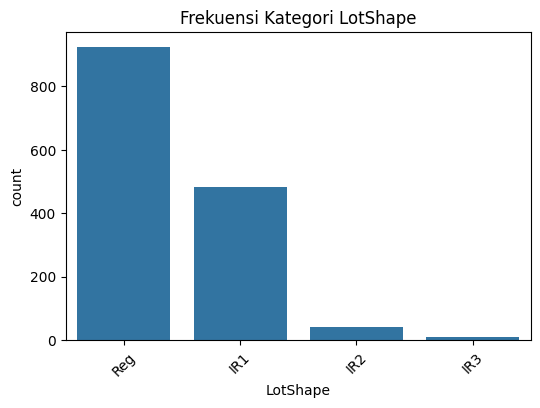

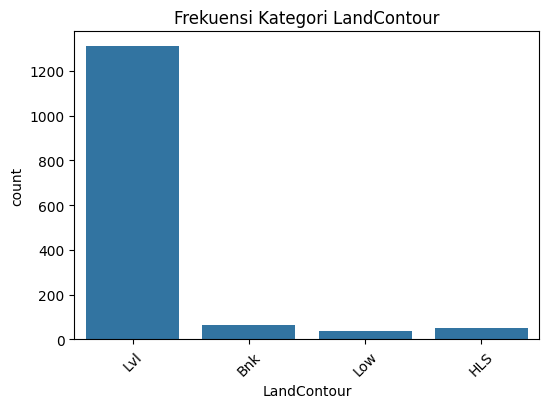

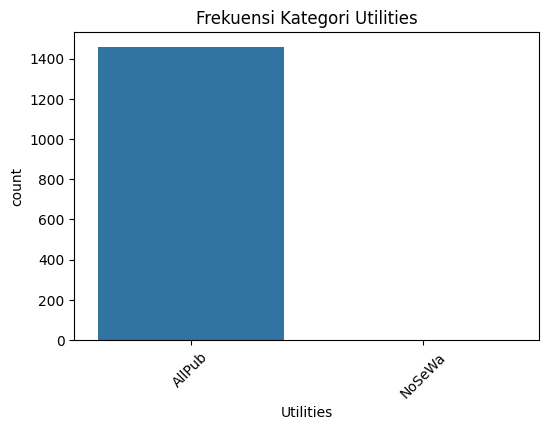

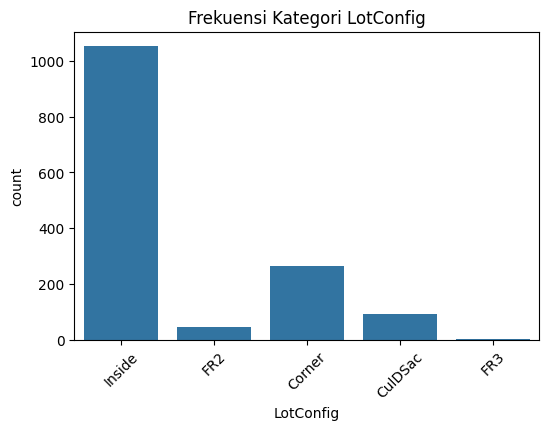

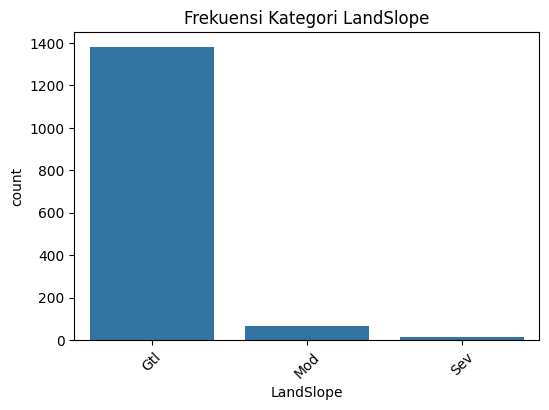

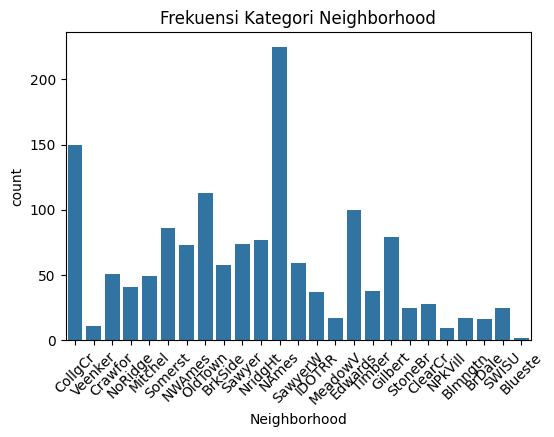

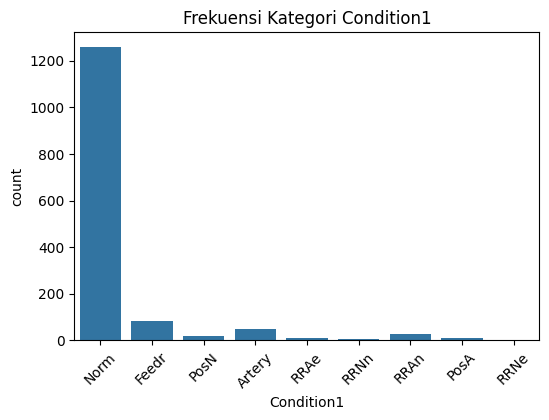

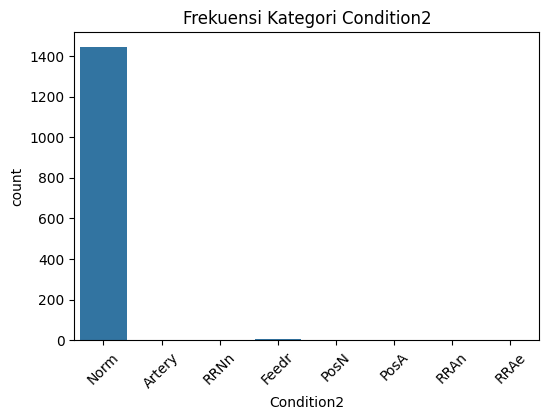

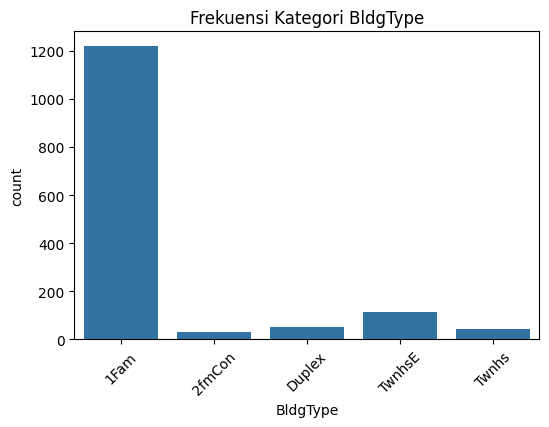

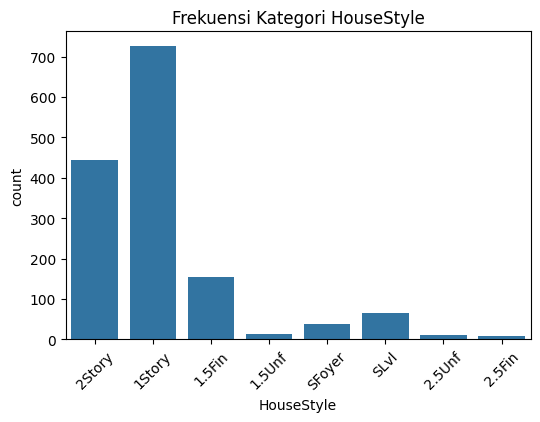

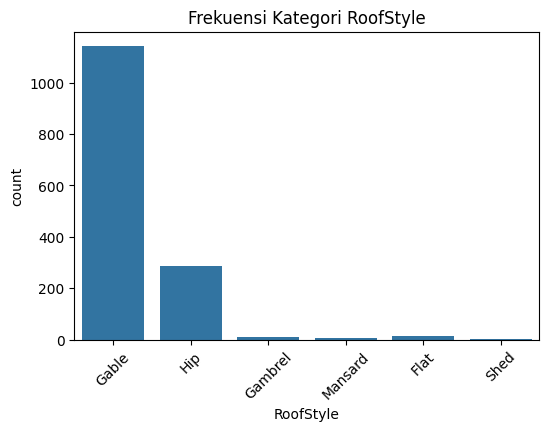

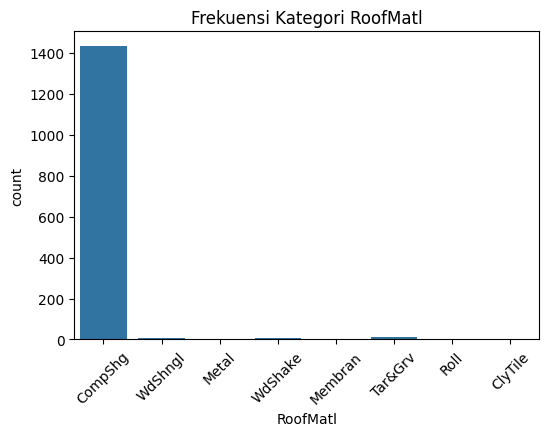

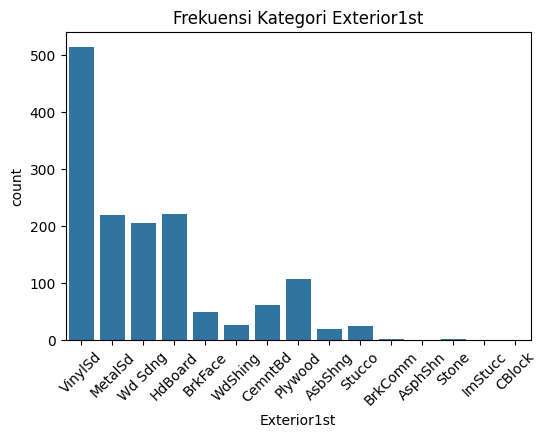

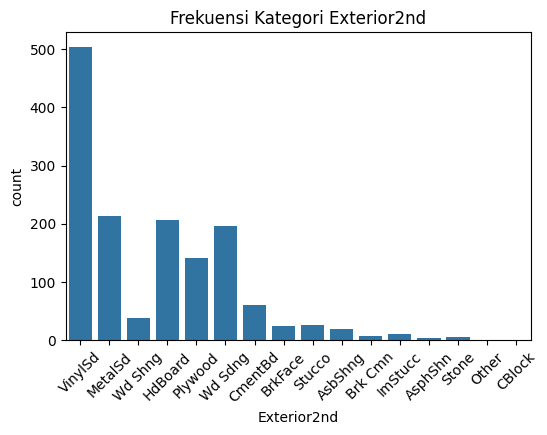

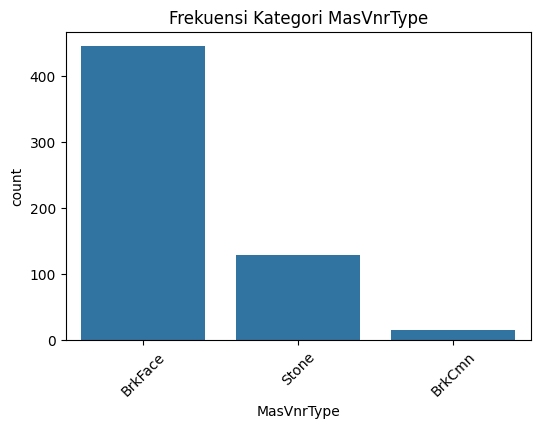

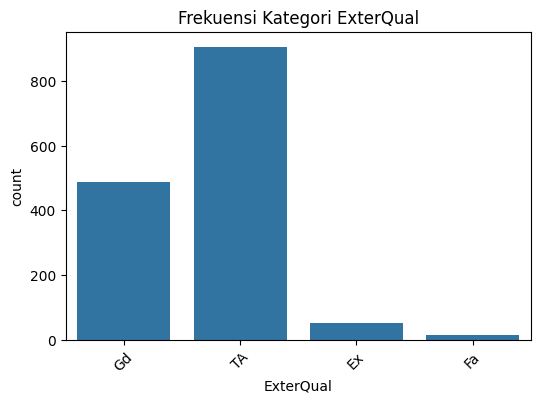

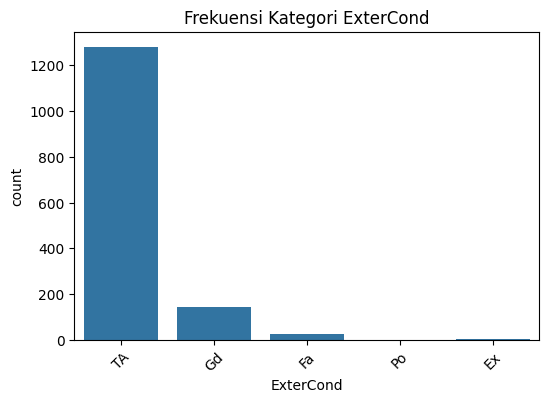

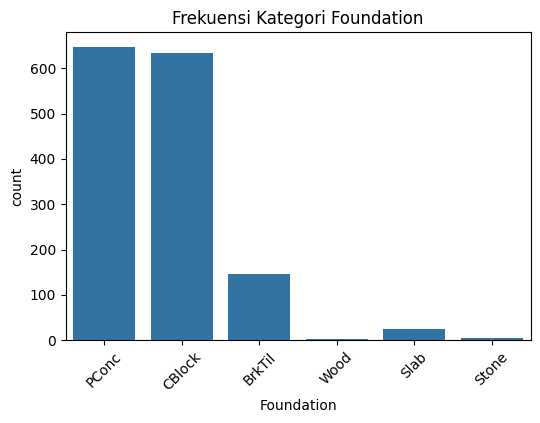

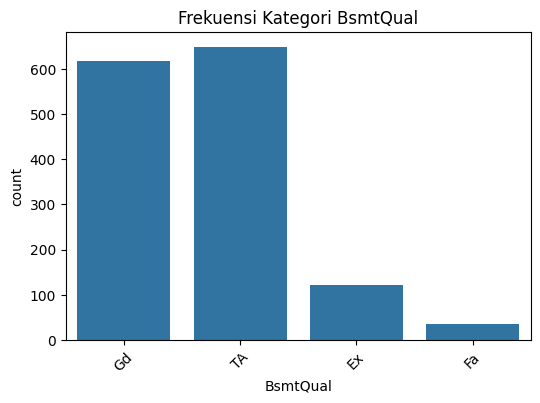

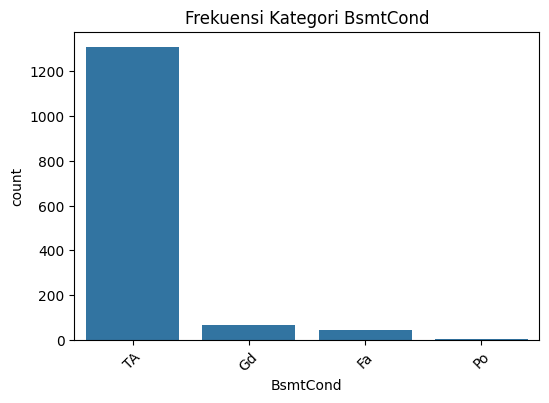

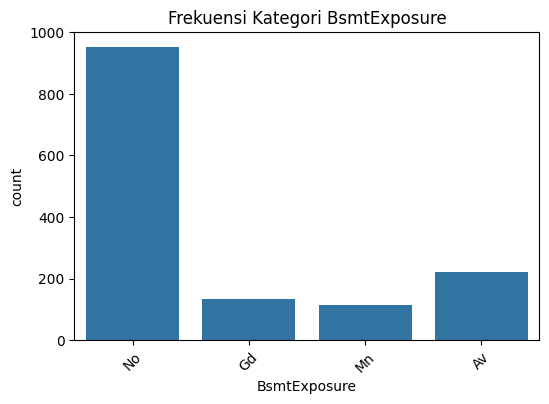

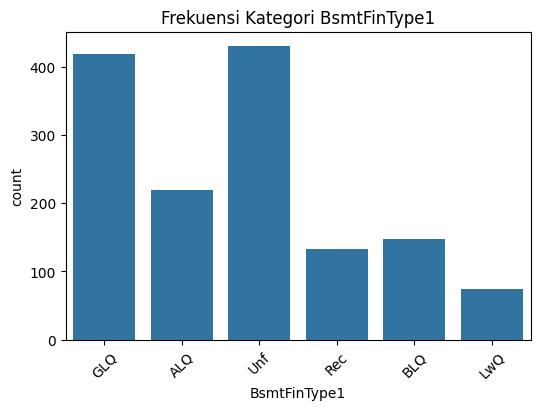

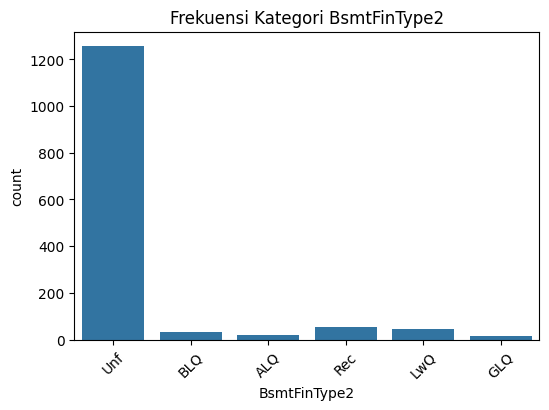

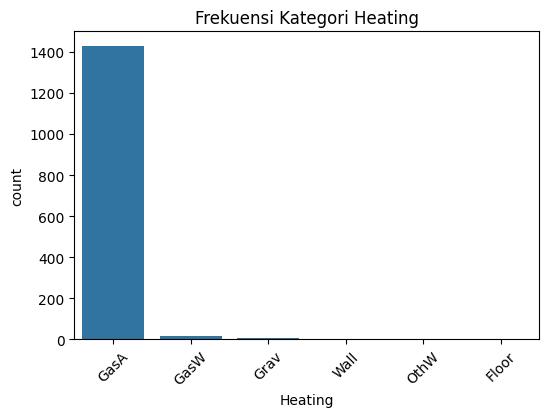

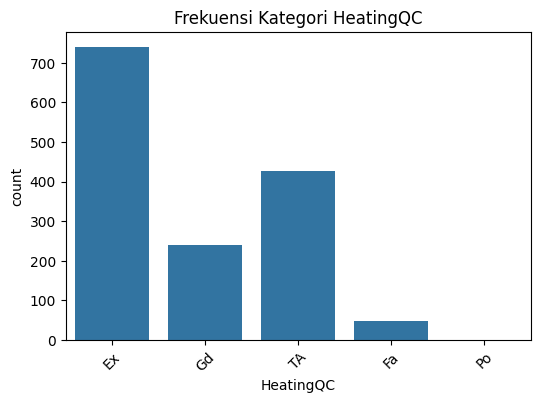

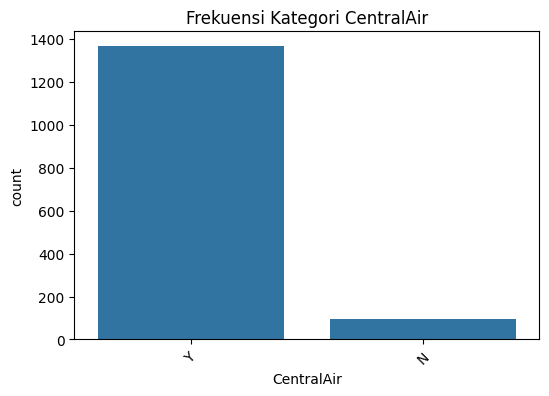

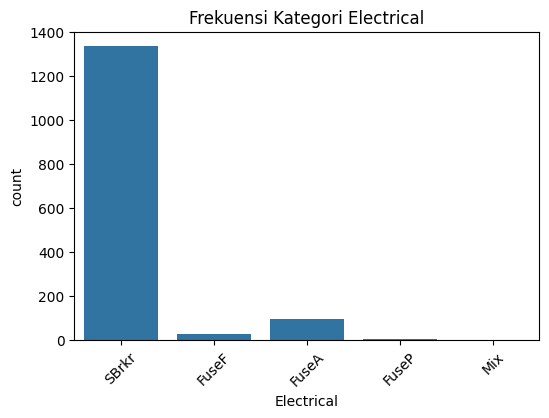

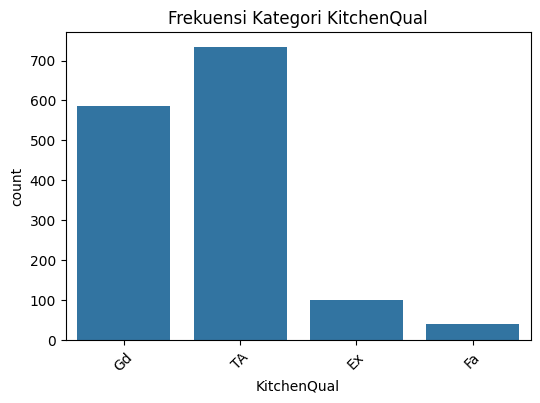

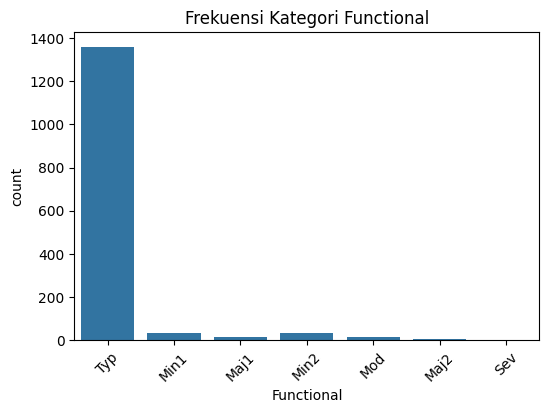

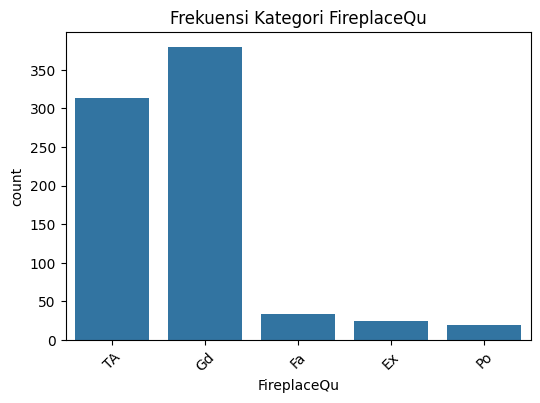

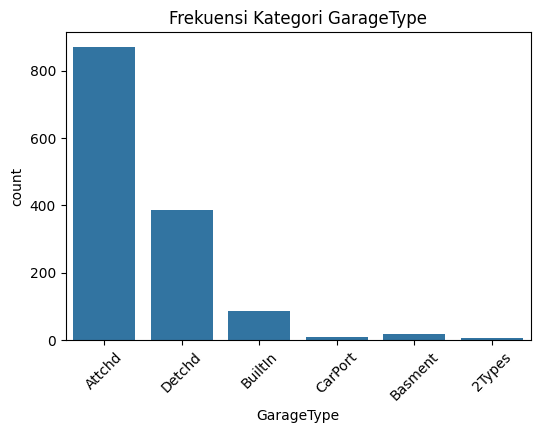

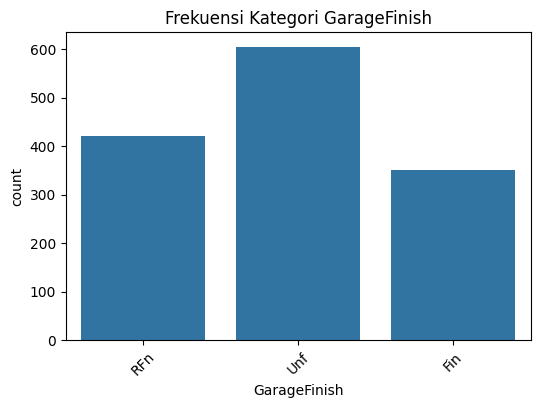

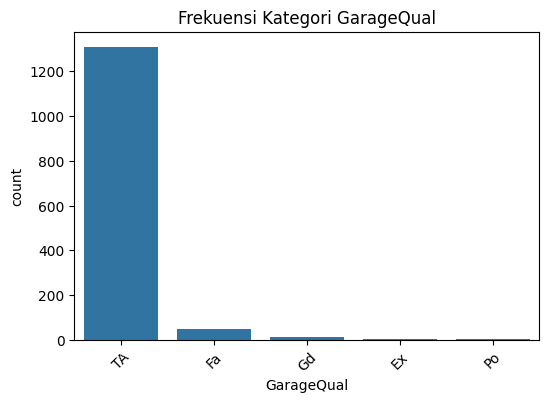

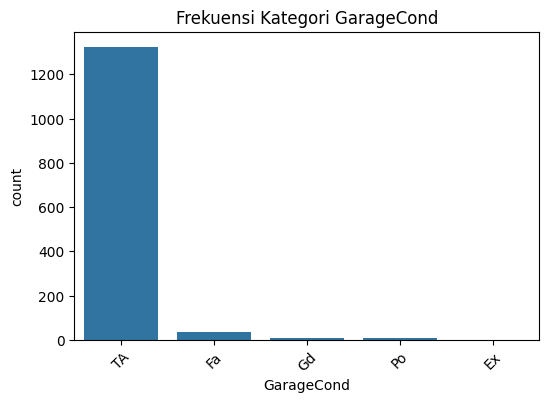

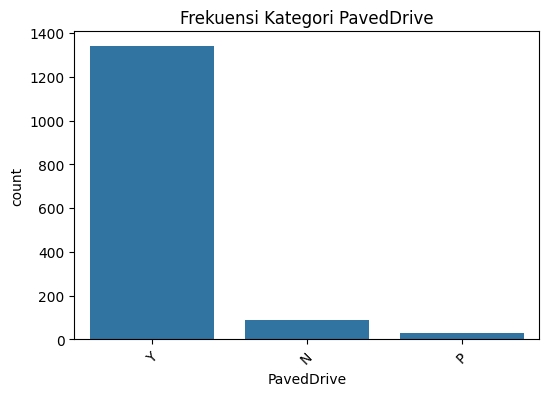

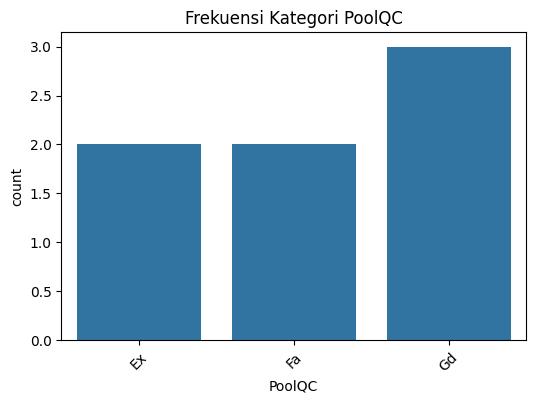

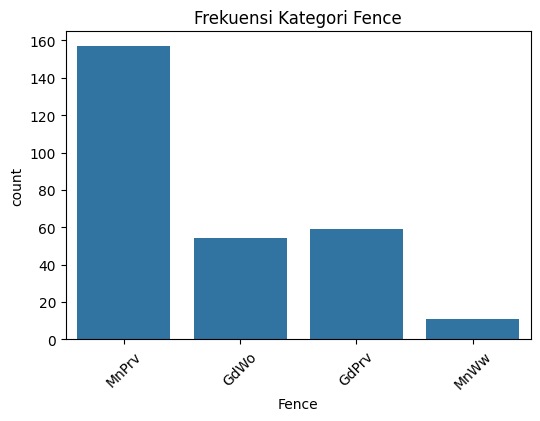

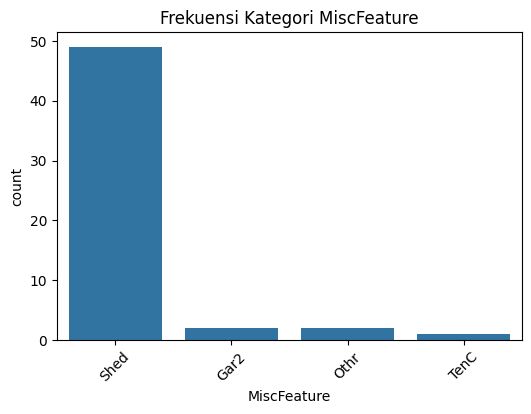

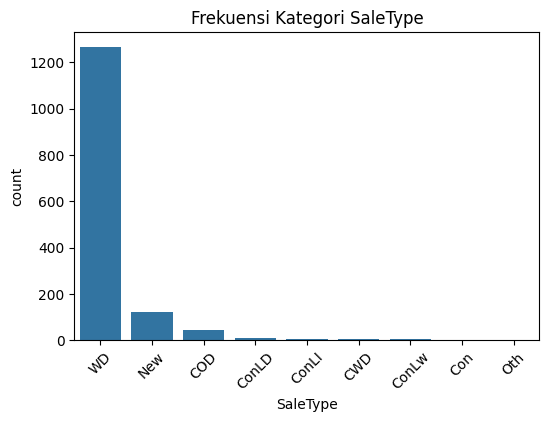

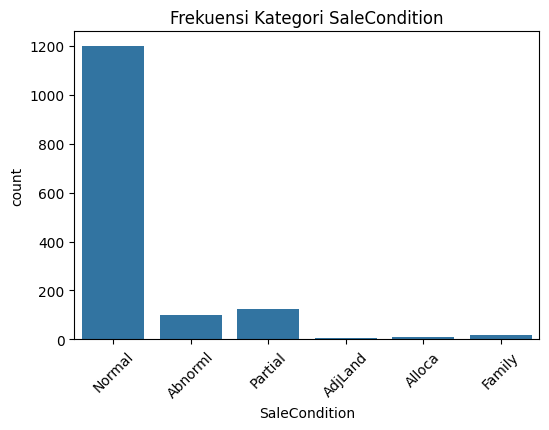

In [6]:
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerik:", numerical_features)
print("Kategori:", categorical_features)

#Visualisasi Numerik
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

#Visualisasi Kategorik
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train_df, x=col)
    plt.title(f'Frekuensi Kategori {col}')
    plt.xticks(rotation=45)
    plt.show()

Feature Engineering

In [15]:
print("Kolom saat ini di train_df:")
print(train_df.columns.tolist())

# Contoh: Imputasi missing values (numerik -> median, kategorik -> modus)
for col in numerical_features:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].median())
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].median())

for col in categorical_features:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

#Cek kolom mana yang masih tersedia di dataframe
categorical_features_existing = [col for col in categorical_features if col in train_df.columns and col in test_df.columns]

#One-hot encoding (ubah fitur kategorikal jadi angka)
train_df = pd.get_dummies(train_df, columns=categorical_features_existing)
test_df = pd.get_dummies(test_df, columns=categorical_features_existing)

#Pastikan kolom train_df dan test_df sama (samakan struktur)
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

#Cek hasil akhir
print("Train columns:", train_df.shape)
print("Test columns :", test_df.shape)



Kolom saat ini di train_df:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'Land

Evaluasi Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pisahkan fitur dan target
X = train_df.drop(columns=['SalePrice', 'Id'])  # Drop 'Id' juga karena tidak informatif
y = train_df['SalePrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Buat dan latih model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 873658179.21
Root Mean Squared Error (RMSE): 29557.71
Mean Absolute Error (MAE): 18266.65
R-squared (R²): 0.8861


#Persamaan Matematika
##1. Mean Squared Error (MSE)
MSE mengukur rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi. Semakin kecil MSE, semakin baik prediksi model.

Rumus Matematis:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Di mana:
- $y_i$ = nilai aktual (ground truth)
- $\hat{y_i}$ = nilai prediksi dari model
- $n$ = jumlah data <br><br>

##2. Root Mean Squared Error (RMSE)
RMSE adalah akar dari MSE, sehingga memiliki satuan yang sama dengan target. RMSE sensitif terhadap outlier karena menggunakan kuadrat error.

Rumus Matematis:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$$<br><br>

##3. Mean Absolute Error (MAE)
MAE mengukur rata-rata nilai mutlak dari error. Lebih robust terhadap outlier dibanding MSE/RMSE karena tidak mengkuadratkan error.

Rumus Matematis:

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
$$<br><br>

##4. R-squared (R²)
R² mengukur seberapa baik variansi dalam data dapat dijelaskan oleh model. Nilai R² berkisar dari 0 hingga 1 (kadang bisa negatif jika model sangat buruk). Semakin mendekati 1, semakin bagus modelnya.

Rumus Matematis:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i-\hat{y_i})}{\sum_{i=1}^{n} (y_i-\overline{y})}
$$

Di mana:
- $\overline{y}$ = nilai rata-rata dari data aktual

